In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("./charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns=['EIN','NAME'],inplace=True)

In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = application_df.APPLICATION_TYPE.value_counts()
application_type_counts


T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

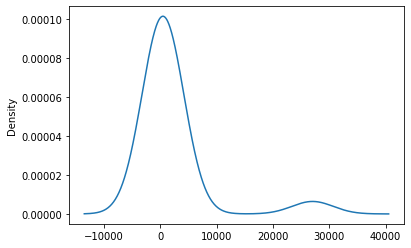

In [5]:
# Visualize the value counts of APPLICATION_TYPE
application_type_counts.plot.density()

In [6]:
# Determine which values to replace
replace_application = list(application_type_counts[application_type_counts < 100].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

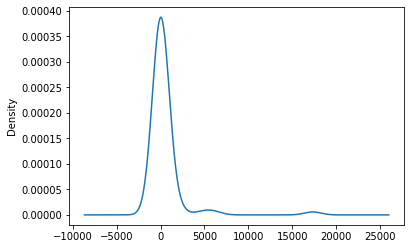

In [8]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 100].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: CLASSIFICATION, dtype: int64

In [10]:
ASK_AMT_counts = application_df.ASK_AMT.value_counts()
ASK_AMT_counts


5000        25398
10478           3
15583           3
63981           3
6725            3
            ...  
5371754         1
30060           1
43091152        1
18683           1
36500179        1
Name: ASK_AMT, Length: 8747, dtype: int64

In [11]:
print(ASK_AMT_counts.min(), ASK_AMT_counts.max())

1 25398


<AxesSubplot:>

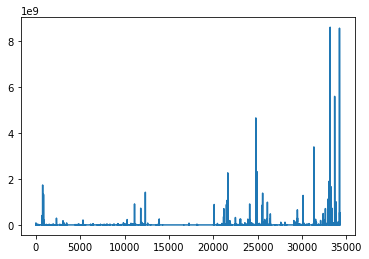

In [12]:
application_df['ASK_AMT'].astype(float).plot()

In [13]:
import numpy as np
bins = pd.array([1000, 5000, 10000, 20000, 50000, 100000, 200000, 500000, 1000000, 2000000, 5000000, 10000000])

In [14]:
labels = bins.astype(object)[1:]
labels

array([5000, 10000, 20000, 50000, 100000, 200000, 500000, 1000000,
       2000000, 5000000, 10000000], dtype=object)

In [15]:
application_df['ASK_AMT'] = pd.cut(application_df['ASK_AMT'], bins=bins, labels=labels, include_lowest=True)

<AxesSubplot:>

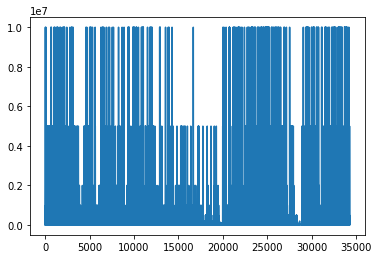

In [16]:
application_df['ASK_AMT'].astype(float).plot()

In [17]:
ASK_AMT_counts = application_df.ASK_AMT.value_counts()
ASK_AMT_counts

5000        25398
50000        1609
100000       1423
500000       1175
200000       1129
20000         789
1000000       650
10000         549
2000000       485
5000000       455
10000000      225
Name: ASK_AMT, dtype: int64

In [18]:
# Generate our categorical variable list
attrition_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
attrition_cat.append('ASK_AMT')
attrition_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS',
 'ASK_AMT']

In [19]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[attrition_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(attrition_cat)
encode_df.head()

C:\Users\Pangloss\.conda\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,APPLICATION_TYPE_T9,...,ASK_AMT_20000.0,ASK_AMT_50000.0,ASK_AMT_100000.0,ASK_AMT_200000.0,ASK_AMT_500000.0,ASK_AMT_1000000.0,ASK_AMT_2000000.0,ASK_AMT_5000000.0,ASK_AMT_10000000.0,ASK_AMT_nan
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(attrition_cat,1)
application_df.head()

C:\Users\Pangloss\AppData\Local\Temp/ipykernel_38844/2119498654.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  application_df = application_df.drop(attrition_cat,1)


,STATUS,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ASK_AMT_20000.0,ASK_AMT_50000.0,ASK_AMT_100000.0,ASK_AMT_200000.0,ASK_AMT_500000.0,ASK_AMT_1000000.0,ASK_AMT_2000000.0,ASK_AMT_5000000.0,ASK_AMT_10000000.0,ASK_AMT_nan
0,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

C:\Users\Pangloss\AppData\Local\Temp/ipykernel_38844/3766499242.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = application_df.drop(["IS_SUCCESSFUL"],1).values


In [22]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [23]:
number_input_features = len(X_train[0])
number_input_features
inputDim = number_input_features

In [24]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=10, max_value=100, step=15),
        activation=activation, input_dim=inputDim))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=5, max_value=25, step=5),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [25]:
# Import the kerastuner library
import kerastuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

C:\Users\Pangloss\AppData\Local\Temp/ipykernel_38844/2980860635.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [26]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 60 Complete [00h 00m 26s]
val_accuracy: 0.728396475315094

Best val_accuracy So Far: 0.728863000869751
Total elapsed time: 00h 11m 16s
INFO:tensorflow:Oracle triggered exit


In [27]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'relu',
 'first_units': 55,
 'num_layers': 5,
 'units_0': 20,
 'units_1': 15,
 'units_2': 15,
 'units_3': 10,
 'units_4': 25,
 'units_5': 20,
 'tuner/epochs': 3,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 2,
 'tuner/round': 0}

In [28]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5550 - accuracy: 0.7289 - 360ms/epoch - 1ms/step
Loss: 0.5550019145011902, Accuracy: 0.728863000869751


In [29]:
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("base_checkpoints/",exist_ok=True)
checkpoint_path = "base_checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch')

# Train the model
fit_model = best_model.fit(X_train_scaled,y_train,epochs=300,callbacks=[cp_callback])

Epoch 1/300
770/804 [===========================>..] - ETA: 0s - loss: 0.5457 - accuracy: 0.7343
Epoch 1: saving model to base_checkpoints\weights.01.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5450 - accuracy: 0.7348
Epoch 2/300
800/804 [============================>.] - ETA: 0s - loss: 0.5433 - accuracy: 0.7355
Epoch 2: saving model to base_checkpoints\weights.02.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5433 - accuracy: 0.7355
Epoch 3/300
767/804 [===========================>..] - ETA: 0s - loss: 0.5418 - accuracy: 0.7359
Epoch 3: saving model to base_checkpoints\weights.03.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5414 - accuracy: 0.7360
Epoch 4/300
763/804 [===========================>..] - ETA: 0s - loss: 0.5408 - accuracy: 0.7380
Epoch 4: saving model to base_checkpoints\weights.04.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5415 - accuracy: 0.7375
Epoch 5/300
770/804 [===

In [30]:
# Evaluate the model using the test data
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6307 - accuracy: 0.7233 - 185ms/epoch - 690us/step
Loss: 0.6307255625724792, Accuracy: 0.7232652902603149


In [31]:
pd.DataFrame(fit_model.history)

,loss,accuracy
0,0.544955,0.734800
1,0.543273,0.735461
2,0.541419,0.735966
3,0.541504,0.737482
4,0.539081,0.738338
...,...,...
295,0.507861,0.752294
296,0.507518,0.752371
297,0.507196,0.752060
298,0.507744,0.751827


<AxesSubplot:>

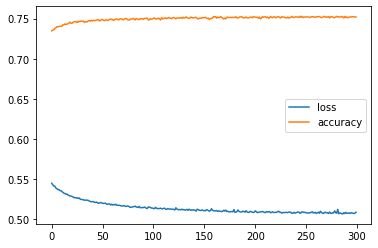

In [32]:
pd.DataFrame(fit_model.history).plot()